# 1: Load Data

In [213]:
import pandas as pd
import numpy as np

# Load dataset
file_path = "neet_counselling_records_200k(1).csv.xlsx"
df = pd.read_excel(file_path)

# Basic info
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


Shape of dataset: (200000, 21)

Columns: ['Year', 'Student_ID', 'Gender', 'Domicile_State', 'Category', 'Quota', 'Round', 'NEET_Rank', 'Marks', 'Pref_College1_ID', 'Pref_College2_ID', 'Pref_College3_ID', 'Admit_Status', 'Admit_College_ID', 'Admit_College_Name', 'Admit_College_State', 'Admit_College_City', 'Admit_Ownership', 'Admit_Department', 'Synthetic_Cutoff_Rank', 'Admit_Rank']


,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Pref_College3_ID,Admit_Status,Admit_College_ID,Admit_College_Name,Admit_College_State,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,C0782,Not Allotted,C0035,"Private Medical College, Lakshadweep City-36",Lakshadweep,City-36,Private,MBBS,37599,242023
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,C0010,Not Allotted,C0131,"Institute of Medical Sciences, Tamil Nadu City-12",Tamil Nadu,City-12,Government,BSc Nursing,12655,167209
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,C0852,Not Allotted,C0696,"Medical College, Kerala City-17",Kerala,City-17,Government,Pharmacy,29164,258703
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,C0162,Not Allotted,C0512,"State Medical College, Haryana City-33",Haryana,City-33,Government,MBBS,23840,126532
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,C0229,Not Allotted,C0227,"Govt. Medical College, Karnataka City-28",Karnataka,City-28,Government,MBBS,2000,291897


In [270]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

## 2: Basic EDA

In [216]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())





Missing values:
 Year                     0
Student_ID               0
Gender                   0
Domicile_State           0
Category                 0
Quota                    0
Round                    0
NEET_Rank                0
Marks                    0
Pref_College1_ID         0
Pref_College2_ID         0
Pref_College3_ID         0
Admit_Status             0
Admit_College_ID         0
Admit_College_Name       0
Admit_College_State      0
Admit_College_City       0
Admit_Ownership          0
Admit_Department         0
Synthetic_Cutoff_Rank    0
Admit_Rank               0
dtype: int64


In [217]:
# Data types
print("\nData Types:\n", df.dtypes)




Data Types:
 Year                      int64
Student_ID               object
Gender                   object
Domicile_State           object
Category                 object
Quota                    object
Round                    object
NEET_Rank                 int64
Marks                     int64
Pref_College1_ID         object
Pref_College2_ID         object
Pref_College3_ID         object
Admit_Status             object
Admit_College_ID         object
Admit_College_Name       object
Admit_College_State      object
Admit_College_City       object
Admit_Ownership          object
Admit_Department         object
Synthetic_Cutoff_Rank     int64
Admit_Rank                int64
dtype: object


In [218]:
# Summary statistics (numeric columns)
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
                 Year      NEET_Rank          Marks  Synthetic_Cutoff_Rank  \
count  200000.000000  200000.000000  200000.000000          200000.000000   
mean     2014.993180  150080.433630     534.396760           52213.309135   
std         6.052703   86681.141706     107.096891           46475.602981   
min      2005.000000       1.000000     328.000000            2000.000000   
25%      2010.000000   74921.000000     442.000000           12359.000000   
50%      2015.000000  150108.500000     534.000000           38093.000000   
75%      2020.000000  225231.000000     627.000000           86233.250000   
max      2025.000000  299999.000000     720.000000          211040.000000   

          Admit_Rank  
count  200000.000000  
mean   150080.404730  
std     86680.680595  
min         1.000000  
25%     74938.500000  
50%    150099.500000  
75%    225214.250000  
max    300000.000000  


## 3: Univariate Analysis

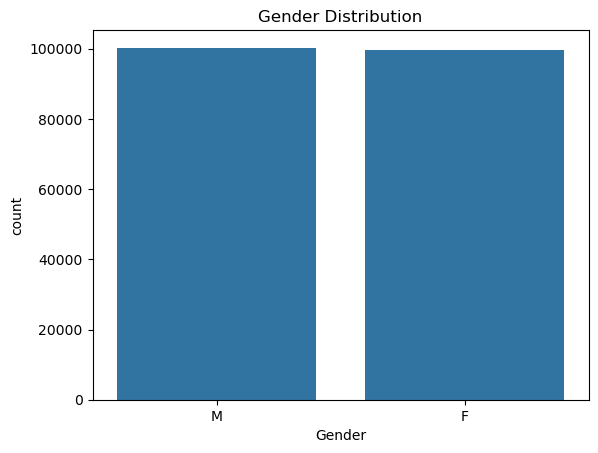

In [220]:
# Gender distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

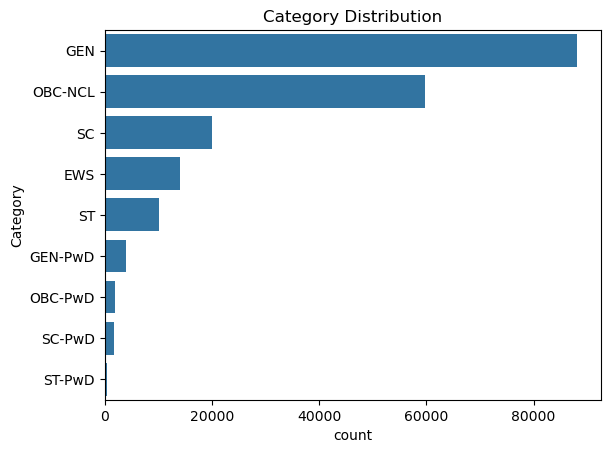

In [221]:
# Category distribution
sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index)
plt.title("Category Distribution")
plt.show()




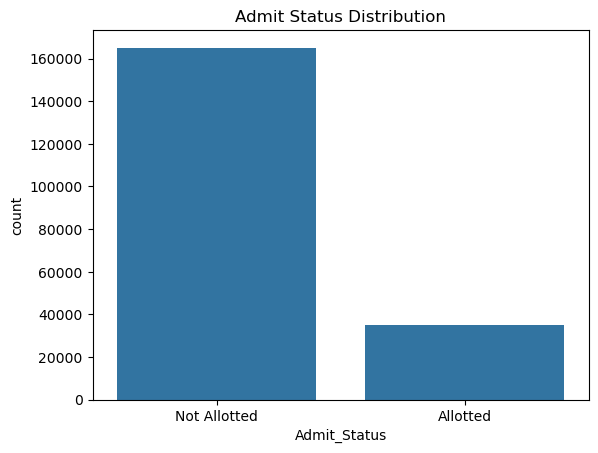

In [222]:

# Admission Status
sns.countplot(x="Admit_Status", data=df)
plt.title("Admit Status Distribution")
plt.show()


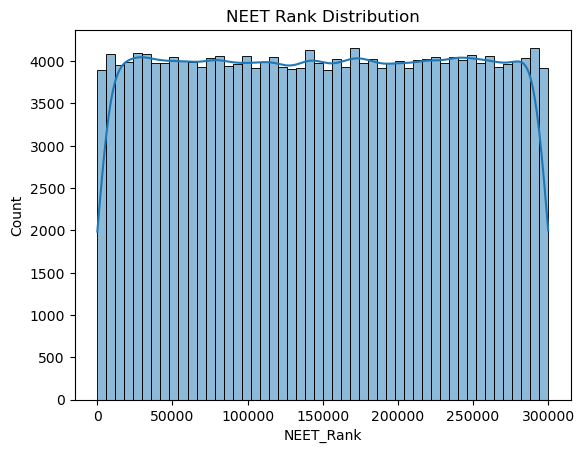

In [223]:

# NEET Rank Distribution
sns.histplot(df["NEET_Rank"], bins=50, kde=True)
plt.title("NEET Rank Distribution")
plt.show()



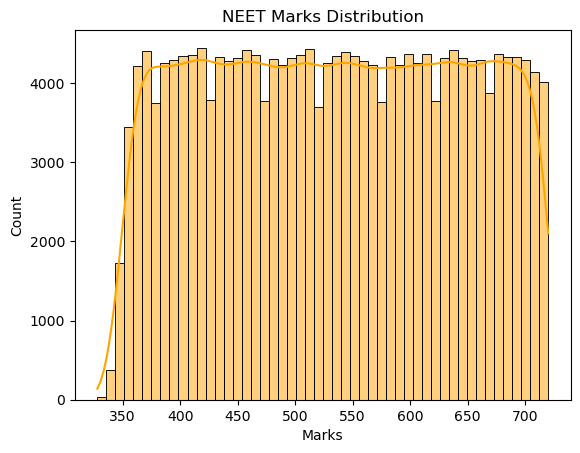

In [224]:
# Marks distribution
sns.histplot(df["Marks"], bins=50, kde=True, color="orange")
plt.title("NEET Marks Distribution")
plt.show()

# 4. Bivariate Analysis

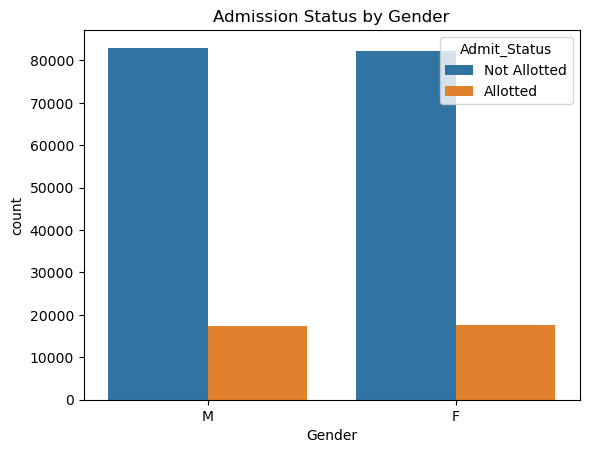

In [226]:
# Gender vs Admission Status
sns.countplot(x="Gender", hue="Admit_Status", data=df)
plt.title("Admission Status by Gender")
plt.show()



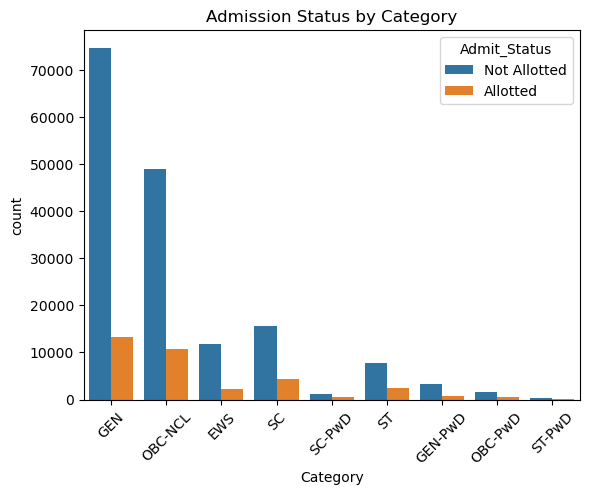

In [227]:
# Category vs Admission Status
sns.countplot(x="Category", hue="Admit_Status", data=df)
plt.title("Admission Status by Category")
plt.xticks(rotation=45)
plt.show()



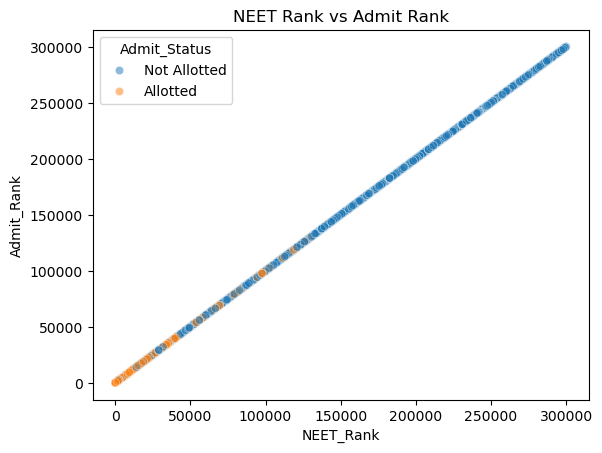

In [228]:
# NEET Rank vs Admit Rank (Scatter)
sns.scatterplot(x="NEET_Rank", y="Admit_Rank", hue="Admit_Status", alpha=0.5, data=df)
plt.title("NEET Rank vs Admit Rank")
plt.show()



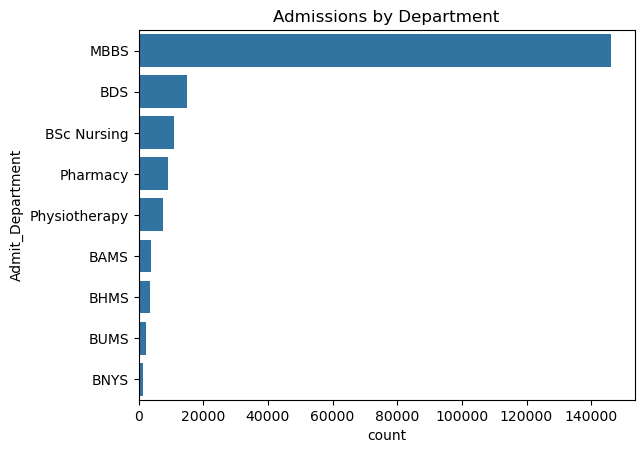

In [229]:
# Department-wise admissions
sns.countplot(y="Admit_Department", data=df, order=df['Admit_Department'].value_counts().index)
plt.title("Admissions by Department")
plt.show()



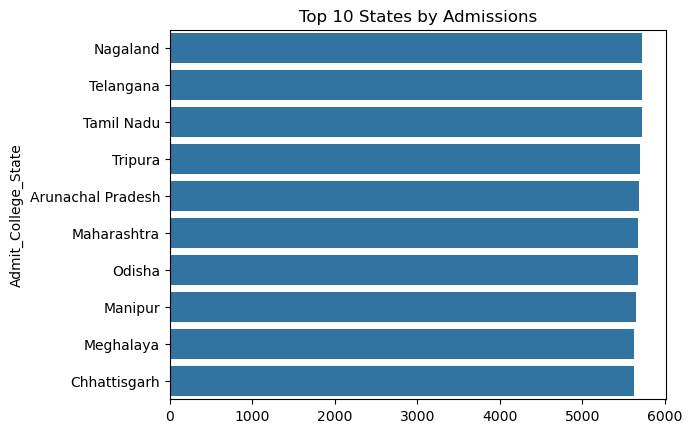

In [230]:
# State-wise admissions
top_states = df['Admit_College_State'].value_counts().head(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States by Admissions")
plt.show()


# 5. Correlation Analysis

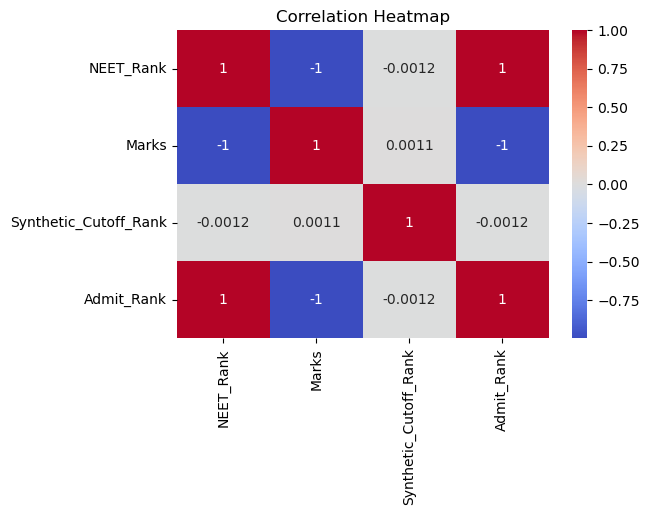

In [232]:
# Numeric correlations
corr = df[['NEET_Rank','Marks','Synthetic_Cutoff_Rank','Admit_Rank']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# 6. Feature Engineering Ideas

In [234]:
# 1. Admission Flag (1 if admitted, else 0)
df['Admitted_Flag'] = df['Admit_Status'].apply(lambda x: 1 if x == "Admitted" else 0)

df.head()


,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_Status,Admit_College_ID,Admit_College_Name,Admit_College_State,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,Not Allotted,C0035,"Private Medical College, Lakshadweep City-36",Lakshadweep,City-36,Private,MBBS,37599,242023,0
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,Not Allotted,C0131,"Institute of Medical Sciences, Tamil Nadu City-12",Tamil Nadu,City-12,Government,BSc Nursing,12655,167209,0
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,Not Allotted,C0696,"Medical College, Kerala City-17",Kerala,City-17,Government,Pharmacy,29164,258703,0
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,Not Allotted,C0512,"State Medical College, Haryana City-33",Haryana,City-33,Government,MBBS,23840,126532,0
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,Not Allotted,C0227,"Govt. Medical College, Karnataka City-28",Karnataka,City-28,Government,MBBS,2000,291897,0


In [235]:
# 2. Preference Match (if admitted college was student’s top preference)
df['Top_Pref_Admitted'] = np.where(df['Admit_College_ID'] == df['Pref_College1_ID'], 1, 0)

df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_College_ID,Admit_College_Name,Admit_College_State,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,C0035,"Private Medical College, Lakshadweep City-36",Lakshadweep,City-36,Private,MBBS,37599,242023,0,1
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,C0131,"Institute of Medical Sciences, Tamil Nadu City-12",Tamil Nadu,City-12,Government,BSc Nursing,12655,167209,0,1
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,C0696,"Medical College, Kerala City-17",Kerala,City-17,Government,Pharmacy,29164,258703,0,1
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,C0512,"State Medical College, Haryana City-33",Haryana,City-33,Government,MBBS,23840,126532,0,1
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,C0227,"Govt. Medical College, Karnataka City-28",Karnataka,City-28,Government,MBBS,2000,291897,0,1


In [236]:
# 3. Rank Difference (how far from cutoff)
df['Rank_Diff'] = df['NEET_Rank'] - df['Synthetic_Cutoff_Rank']



df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_College_Name,Admit_College_State,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted,Rank_Diff
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,"Private Medical College, Lakshadweep City-36",Lakshadweep,City-36,Private,MBBS,37599,242023,0,1,204504
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,"Institute of Medical Sciences, Tamil Nadu City-12",Tamil Nadu,City-12,Government,BSc Nursing,12655,167209,0,1,154670
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,"Medical College, Kerala City-17",Kerala,City-17,Government,Pharmacy,29164,258703,0,1,229531
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,"State Medical College, Haryana City-33",Haryana,City-33,Government,MBBS,23840,126532,0,1,102520
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,"Govt. Medical College, Karnataka City-28",Karnataka,City-28,Government,MBBS,2000,291897,0,1,289870


In [237]:
# 4. College Type (binary encoding Government=1, Private=0)
df['College_Type'] = df['Admit_Ownership'].apply(
    lambda x: 1 if str(x).lower() == "government" else (0 if pd.notna(x) else np.nan)
)


df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_College_State,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted,Rank_Diff,College_Type
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,Lakshadweep,City-36,Private,MBBS,37599,242023,0,1,204504,0
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,Tamil Nadu,City-12,Government,BSc Nursing,12655,167209,0,1,154670,1
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,Kerala,City-17,Government,Pharmacy,29164,258703,0,1,229531,1
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,Haryana,City-33,Government,MBBS,23840,126532,0,1,102520,1
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,Karnataka,City-28,Government,MBBS,2000,291897,0,1,289870,1


In [238]:
# 5. Admission Round as categorical feature
df['Round'] = df['Round'].astype(str)
df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_College_State,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted,Rank_Diff,College_Type
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,Lakshadweep,City-36,Private,MBBS,37599,242023,0,1,204504,0
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,Tamil Nadu,City-12,Government,BSc Nursing,12655,167209,0,1,154670,1
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,Kerala,City-17,Government,Pharmacy,29164,258703,0,1,229531,1
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,Haryana,City-33,Government,MBBS,23840,126532,0,1,102520,1
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,Karnataka,City-28,Government,MBBS,2000,291897,0,1,289870,1


In [239]:

# 6. Success Rate per Category (aggregate feature)
category_success = df.groupby("Category")['Admitted_Flag'].mean().to_dict()
df['Category_Success_Rate'] = df['Category'].map(category_success)
df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_College_City,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted,Rank_Diff,College_Type,Category_Success_Rate
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,City-36,Private,MBBS,37599,242023,0,1,204504,0,0.0
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,City-12,Government,BSc Nursing,12655,167209,0,1,154670,1,0.0
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,City-17,Government,Pharmacy,29164,258703,0,1,229531,1,0.0
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,City-33,Government,MBBS,23840,126532,0,1,102520,1,0.0
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,City-28,Government,MBBS,2000,291897,0,1,289870,1,0.0


In [240]:

# 7. State Migration (1 if domicile != admit state)
df['State_Migration'] = np.where(df['Domicile_State'] != df['Admit_College_State'], 1, 0)
df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_Ownership,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted,Rank_Diff,College_Type,Category_Success_Rate,State_Migration
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,Private,MBBS,37599,242023,0,1,204504,0,0.0,1
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,Government,BSc Nursing,12655,167209,0,1,154670,1,0.0,1
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,Government,Pharmacy,29164,258703,0,1,229531,1,0.0,0
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,Government,MBBS,23840,126532,0,1,102520,1,0.0,1
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,Government,MBBS,2000,291897,0,1,289870,1,0.0,1


In [241]:

# 8. Normalized Marks (for ML scaling)
df['Marks_Normalized'] = (df['Marks'] - df['Marks'].min()) / (df['Marks'].max() - df['Marks'].min())
df.head()

,Year,Student_ID,Gender,Domicile_State,Category,Quota,Round,NEET_Rank,Marks,Pref_College1_ID,...,Admit_Department,Synthetic_Cutoff_Rank,Admit_Rank,Admitted_Flag,Top_Pref_Admitted,Rank_Diff,College_Type,Category_Success_Rate,State_Migration,Marks_Normalized
0,2014,SID1000000,M,Telangana,GEN,AIQ,Round 3,242103,419,C0035,...,MBBS,37599,242023,0,1,204504,0,0.0,1,0.232143
1,2022,SID1000001,M,Kerala,OBC-NCL,State Quota,Round 1,167325,495,C0131,...,BSc Nursing,12655,167209,0,1,154670,1,0.0,1,0.426020
2,2016,SID1000002,M,Kerala,GEN,State Quota,Round 1,258695,408,C0696,...,Pharmacy,29164,258703,0,1,229531,1,0.0,0,0.204082
3,2006,SID1000003,M,West Bengal,OBC-NCL,State Quota,Round 1,126360,572,C0512,...,MBBS,23840,126532,0,1,102520,1,0.0,1,0.622449
4,2010,SID1000004,M,Delhi,GEN,State Quota,Round 1,291870,350,C0227,...,MBBS,2000,291897,0,1,289870,1,0.0,1,0.056122


# 7. Save Cleaned Data for Power BI

In [243]:
# Export processed dataset
df.to_csv("neet_cleaned_processed.csv", index=False)
print("Processed dataset saved as 'neet_cleaned_processed.csv'")


Processed dataset saved as 'neet_cleaned_processed.csv'
